# Guessing the number by providing hint as higher or lower

you need to guess the number in the given iteration. first of all make sure the range to be guess. when your program guess the number you need to provide hint as this is a higher number or lower number.
If you reach to the number in the given iteration you set the message that you won the game or set the message that Game Over!

In [12]:
from typing import Dict, List, TypedDict
from langgraph.graph import StateGraph, END, START
from IPython.display import Image, display
import random

In [59]:
class AgentState(TypedDict):
    name : str
    lower_bound : int
    upper_bound : int
    counter : int
    counter_max : int
    message : str
    guess_number : int
    target_number : int

In [65]:
def greeting_action(state : AgentState) -> AgentState:
    """this function welcomes you in the game & check the default parameters."""

    state["name"] = f"Hi {state["name"]}! Welcome to the Guess Game. You have {state["counter_max"]} chances to win the game."
    state["counter"] = 0
    return state

def number_checking(state : AgentState) -> AgentState:
    """this function check the input values of all the variable, or use default values."""

    if state["lower_bound"] < 0 | state["lower_bound"] > state["upper_bound"]:
        state["lower_bound"] = 0

    if state["counter_max"] < 0:
        state["counter_max"] = 7
    
    if state["target_number"] < 0:
        state["target_number"] = 0
    
    return state

def guess_action(state : AgentState) -> AgentState:
    """this function make a guess by random number generator."""

    print("Chance:", state["counter"]+1)
    print("Lower Bound:", state["lower_bound"])
    print("Upper Bound", state["upper_bound"])
    state["guess_number"] = random.randint(state["lower_bound"], state["upper_bound"])
    print("Guess Number:", state["guess_number"])
    print("Target Number:", state["target_number"])
    state["counter"] += 1

    return state

def hint_action(state : AgentState) -> AgentState:
    """This function gives you the hint to change the lower and upper bound as per the guess."""
    if state["guess_number"] < state["target_number"]:
            print("HINT : Target number is higher than the guessed number.")
            state["lower_bound"] = state["guess_number"]
    else:
        print("HINT : Target number is lower than the guessed number.")
        state["upper_bound"] = state["guess_number"]
    return state


def looping_action(state : AgentState) -> AgentState:
    """This function decide the flow and the loop."""
    
    if (state["counter"] >= state["counter_max"]) | (state["guess_number"] == state['target_number']):
        return "exit"
    else:
        return "loop"

def final_message(state : AgentState) -> AgentState:
    """This function provides you the final result whether you won or loss the game."""

    if state["guess_number"] == state["target_number"]:
        state["message"] = f"Congratulations you won the game by finding {state["target_number"]}"
        state["message"] = state["message"] + f" number in {state["counter"]} chance."
    else:
        state["message"] = f"Better Luck Next Time! Game Over!"
    
    return state

In [66]:
graph = StateGraph(AgentState)
graph.add_node("greeting", greeting_action)
graph.add_node("number_checker", number_checking)
graph.add_node("guess_node", guess_action)
graph.add_node("hint_node", hint_action)
graph.add_node("result_node", final_message)

graph.set_entry_point("greeting")
graph.add_edge("greeting", "number_checker")
graph.add_edge("number_checker", "guess_node")
graph.add_edge("guess_node", "hint_node")

graph.add_conditional_edges(
    "hint_node",
    looping_action,
    {
        "loop" : "guess_node",
        "exit" : "result_node"
    }
)
graph.add_edge("result_node", END)

app = graph.compile()

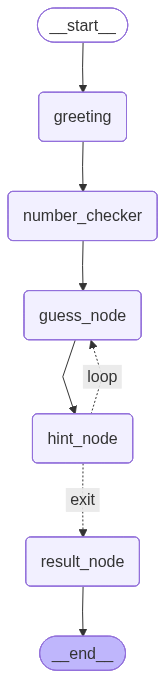

In [67]:
display(Image(app.get_graph().draw_mermaid_png()))

In [68]:
result = app.invoke(
    {
        "name" : "Gaurav",
        "lower_bound" : 5,
        "upper_bound" : 20,
        "counter" : -2,
        "counter_max" : 7,
        "target_number" : 15
    }
)

print(result)

Chance: 1
Lower Bound: 5
Upper Bound 20
Guess Number: 14
Target Number: 15
HINT : Target number is higher than the guessed number.
Chance: 2
Lower Bound: 14
Upper Bound 20
Guess Number: 20
Target Number: 15
HINT : Target number is lower than the guessed number.
Chance: 3
Lower Bound: 14
Upper Bound 20
Guess Number: 20
Target Number: 15
HINT : Target number is lower than the guessed number.
Chance: 4
Lower Bound: 14
Upper Bound 20
Guess Number: 15
Target Number: 15
HINT : Target number is lower than the guessed number.
{'name': 'Hi Gaurav! Welcome to the Guess Game. You have 7 chances to win the game.', 'lower_bound': 14, 'upper_bound': 15, 'counter': 4, 'counter_max': 7, 'message': 'Congratulations you won the game by finding 15 number in 4 chance.', 'guess_number': 15, 'target_number': 15}


In [69]:
print(result["message"])

Congratulations you won the game by finding 15 number in 4 chance.
